Nome: Ramon Gomes Paulino       - RA: 250504

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import inspect

1) Considere a tabela:
    | X  |  Y |
    |:--:|:--:|
    | 2  |94.8|
    | 5  |98.7|
    | 8  |81.3|
    | 10 |74.9|
    | 14 |68.7|
    | 17 |64.0|
    | 27 |49.3|
    | 31 |44.0|
    | 35 |39.1|
    | 44 |31.6|

a) Ajuste as funções:<br>

    phi1(x) = a*e^(bx)
    phi2(x) = x / (a+bx)

aos dados tabelados usando o método dos quadrados mínimos.

In [2]:
def minimos_quadrados_phi1(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x2 = np.sum(x ** 2)

    # Calculando os coeficientes b e A
    b = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
    A = (sum_y - b * sum_x) / n

    # Convertendo A de volta para a
    a = np.exp(A)

    return a, b

def minimos_quadrados_phi2(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x2 = np.sum(x ** 2)

    # Calculando os coeficientes a e b
    b = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
    a = (sum_y - b * sum_x) / n

    return a, b

In [3]:
print("##########################################################")
print("A - Ajuste de Mínimos Quadrados para as Funções phi1(x) e phi2(x):\n")

X = np.array([2, 5, 8, 10, 14, 17, 27, 31, 35, 44])
Y = np.array([94.8, 98.7, 81.3, 74.9, 68.7, 64.0, 49.3, 44.0, 39.1, 31.6])

a_phi1,b_phi1 = minimos_quadrados_phi1(X, np.log(Y))

print(f"Coeficiente a_phi1: {a_phi1}\n")
print(f"Coeficiente b_phi1: {b_phi1}\n")

#plotando os dados originais e o ajuste de mínimos quadrados para phi1(x) = a*e^(bx)
y_fit_phi1 = a_phi1 * np.exp(b_phi1 * X)

#levando de volta para a forma original, temos:
print(f"Ajuste de mínimos quadrados na forma original: phi1(x) = {a_phi1} * e^({b_phi1} * x)\n")

# Para ajustar a função agora a phi2(x) =  x / (a+bx), temos que rearranjar a equação para uma forma linear.
# Multiplicando ambos os lados por (a + bx), obtemos:
# y * (a + bx) = x
# Rearranjando, temos:
# y * a + y * b * x = x
# Agora, podemos definir Y'' = x / y, e a equação se torna:
# Y'' = a + b * x
# Agora, podemos aplicar o método dos mínimos quadrados para encontrar os coeficientes a e b.
a_phi2, b_phi2 = minimos_quadrados_phi2(X, X / Y)

y_fit_phi2 = X / (a_phi2 + b_phi2 * X)

print(f"Coeficiente a_phi2: {a_phi2}\n")
print(f"Coeficiente b_phi2: {b_phi2}\n")

print(f"Ajuste de mínimos quadrados na forma original: phi2(x) = x / ({a_phi2} + {b_phi2} * x)\n")

##########################################################
A - Ajuste de Mínimos Quadrados para as Funções phi1(x) e phi2(x):

Coeficiente a_phi1: 102.51669347327382

Coeficiente b_phi1: -0.02721283231502323

Ajuste de mínimos quadrados na forma original: phi1(x) = 102.51669347327382 * e^(-0.02721283231502323 * x)

Coeficiente a_phi2: -0.165360958382799

Coeficiente b_phi2: 0.030914226011435376

Ajuste de mínimos quadrados na forma original: phi2(x) = x / (-0.165360958382799 + 0.030914226011435376 * x)



############################################################################################################ </br>
b)Apresente no mesmo gráfico os pontos tabelados (diagrama de dispersão) e as funções ajustadas φ1 e
φ2.


B - Comparação dos Ajustes de Mínimos Quadrados:



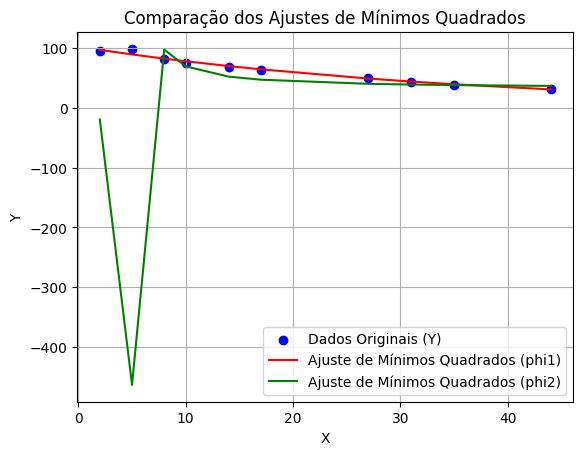

In [4]:
#B) Plotando os dados originais e o ajuste de mínimos quadrados para phi1(x) = a*e^(bx) e phi2(x) = x / (a + bx)
print("B - Comparação dos Ajustes de Mínimos Quadrados:\n")
plt.scatter(X, Y, color='blue', label='Dados Originais (Y)')
plt.plot(X, y_fit_phi1, color='red', label='Ajuste de Mínimos Quadrados (phi1)')
plt.plot(X, y_fit_phi2, color='green', label='Ajuste de Mínimos Quadrados (phi2)')
plt.title('Comparação dos Ajustes de Mínimos Quadrados')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

################################################################################################### </br>
c) Calcule a soma dos quadrados dos desvios em que a∗ e b∗ representam os parâmetros determinados pelo método dos quadrados mínimos.

![alt text](<eq. 2.png>)

In [5]:
#C) Calculando a soma dos quadrados dos erros (SSE) para cada ajuste
sse_phi1 = np.sum((Y - y_fit_phi1) ** 2)
sse_phi2 = np.sum((Y - y_fit_phi2) ** 2)
print("C - Soma dos Quadrados dos Erros (SSE):\n")
print(f"SSE (phi1): {sse_phi1}")
print(f"SSE (phi2): {sse_phi2}")

C - Soma dos Quadrados dos Erros (SSE):

SSE (phi1): 104.5976280166932
SSE (phi2): 329955.60268287925


##########################################################<br>
d) Com base nos itens (b) e (c), qual das funções φ1 e φ3 melhor se ajusta aos pontos tabelados? Justifique sua resposta! </br>

Quem melhor se ajusta aos pontos tabelados é a função phi1, pois contém a menor soma de erro quadrático dentre as duas funções sugeridas e também não tem uma descrepância grande quando o valor de b*x se aproxima de a, como na segunda função, que temos um pico, dado pela divisão ter um denominador muito próximo de 0, o que causa o erro quadrático acumulado grande

##############################################################################</br>
2) Considere os dados apresentados nas seguintes tabelas:
   
   ![alt text](tab_q2.png)

Calcule o valor aproximado de x tal que f(g(x)) = 0.6, usando polinômios interpolantes de grau 2.
Apresente os calculos ou os comandos utilizados para determinar a aproximação de x!

In [6]:
#definindo diferenças divididas de ordem 2
def diff_div_ordem2(x_vals, y_vals):
    n = len(x_vals)
    coef = np.zeros((n, n))
    coef[:,0] = y_vals

    for j in range(1, n):
        for i in range(n - j):
            # print(coef,"\n")
            coef[i][j] = (coef[i + 1][j - 1] - coef[i][j - 1]) / (x_vals[i + j] - x_vals[i])
            # print(coef,"\n")

    return coef[0]

#definindo o interpolador de Newton/parenteses encaixados
def newton_interpolador(x, x_vals, coef):
    n = len(coef)
    result = coef[0]
    prod = 1.0

    for i in range(1, n):
        prod *= (x - x_vals[i - 1])
        result += coef[i] * prod

    return result

como queremos o valor que faz f(g(x)) = 0.6, podemos pegar um conjunto de 3 pontos próximos a esse valor (0.6) e fazer o ajuste com polinômios interpoladores de grau 2. para isto, podemos escrever W(f), com isto, teremos W(0.6) = w_aprox.

os pontos escolhidos para f(w) próximo de 0.6 são:

In [7]:
W = np.array([0.2, 0.4, 0.6])
F = np.array([0.819, 0.67, 0.549])

#invertendo a ordem dos pontos para encontrar os coeficientes tal que f(w) = 0.6 e aplicando diferenças divididas de ordem 2
alfa_w  = diff_div_ordem2(F,W)
print(f"Coeficientes de diferenças divididas de ordem 2 para W(f): {alfa_w}\n")

#aproximando w para f(w) = 0.6
w_aprox = newton_interpolador(0.6, F, alfa_w)
print(f"Valor aproximado de w para f(w) = 0.6 : {w_aprox}\n")


Coeficientes de diferenças divididas de ordem 2 para W(f): [ 0.2        -1.34228188  1.15040994]

Valor aproximado de w para f(w) = 0.6 : 0.5115955158664128



Repetindo o mesmo procedimento anterior, podemos encontrar o valor de X(W) = x_aprox, que satisfaz a condição de f(g(x)) = 0.6

In [8]:
#os pontos escolhidos para g(x) próximo de w_aprox são:
X = np.array([1.4, 1.7, 1.8])
G = np.array([0.480, 0.560, 0.780])

#invertendo a ordem dos pontos para encontrar os coeficientes tal que g(X) = w_aprox e aplicando diferenças divididas de ordem 2
alfa_g = diff_div_ordem2(G, X)
print(f"Coeficientes de diferenças divididas de ordem 2 para g(X): {alfa_g}\n")

#portanto, o polinômio interpolador de Newton de ordem 2 é dado por:
x_aprox = newton_interpolador(w_aprox, G, alfa_g)
print(f"Valor aproximado de x para f(g(x)) = 0.6 : {x_aprox}\n")


Coeficientes de diferenças divididas de ordem 2 para g(X): [  1.4          3.75       -10.98484848]

Valor aproximado de x para f(g(x)) = 0.6 : 1.5352830234183663

